In [1]:
import sys
import os

SCRIPT_PATH = os.path.join(os.path.abspath(os.path.dirname('../__file__')), 'script')
sys.path.insert(0, SCRIPT_PATH)


from markov_pyactup import *
from statsmodels.formula.api import logit, glm
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import glob
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)


main_dir = os.path.dirname(os.getcwd())
subject_dir = os.path.join(main_dir, 'data', 'human', '"online_data')
pr_dir = os.path.join(main_dir, 'data', 'model', 'param_recovery_test')
main_dir, subject_dir

sns.set_theme(style="white", rc={"axes.spines.right": True, "axes.spines.top": True}, font_scale=1.3)

Error trying to connect to ACT-R at 127.0.0.1 : 2651 with exception (<class 'ConnectionRefusedError'>, ConnectionRefusedError(111, 'Connection refused'), <traceback object at 0x7f43babcd940>)
ACT-R connection NOT established, but no exception detected or already handled.
Could not start ACT-R connection.


## Run Parameter Recovery 

In [2]:
MarkovSimulation.simulate_param_recovery(pr_dir=pr_dir, verbose=True)

START OPT ORI...
... SAVED optimized parameter data ...[1] [markov-rl-hybrid]
... SAVED optimized parameter data ...[1] [markov-ibl-hybrid]
... SAVED optimized parameter data ...[2] [markov-rl-hybrid]
... SAVED optimized parameter data ...[2] [markov-ibl-hybrid]
... SAVED optimized parameter data ...[3] [markov-rl-hybrid]
... SAVED optimized parameter data ...[3] [markov-ibl-hybrid]
... SAVED optimized parameter data ...[4] [markov-rl-hybrid]
... SAVED optimized parameter data ...[4] [markov-ibl-hybrid]
... SAVED optimized parameter data ...[5] [markov-rl-hybrid]
... SAVED optimized parameter data ...[5] [markov-ibl-hybrid]
... SAVED optimized parameter data ...[6] [markov-rl-hybrid]
... SAVED optimized parameter data ...[6] [markov-ibl-hybrid]
... SAVED optimized parameter data ...[7] [markov-rl-hybrid]
... SAVED optimized parameter data ...[7] [markov-ibl-hybrid]
... SAVED optimized parameter data ...[8] [markov-rl-hybrid]
... SAVED optimized parameter data ...[8] [markov-ibl-hybrid]

## Correlation

In [3]:
df_ori = pd.concat([pd.read_csv(f) for f in glob.glob(os.path.join(pr_dir, '*ori*', '*'))], axis=0).melt(id_vars=['subject_id', 'estimate_model'], var_name='param_name', value_name='param_value').sort_values(by = ['subject_id', 'estimate_model'])
df_rec = pd.concat([pd.read_csv(f) for f in glob.glob(os.path.join(pr_dir, '*rec*', '*'))], axis=0).melt(id_vars=['subject_id', 'estimate_model'], var_name='param_name', value_name='param_value').sort_values(by = ['subject_id', 'estimate_model'])

In [4]:
dfm = pd.merge(df_ori.drop(['estimate_model'], axis=1), df_rec.drop(['estimate_model'], axis=1), 
         on=['subject_id', 'param_name'], suffixes=('.ori', '.rec'))

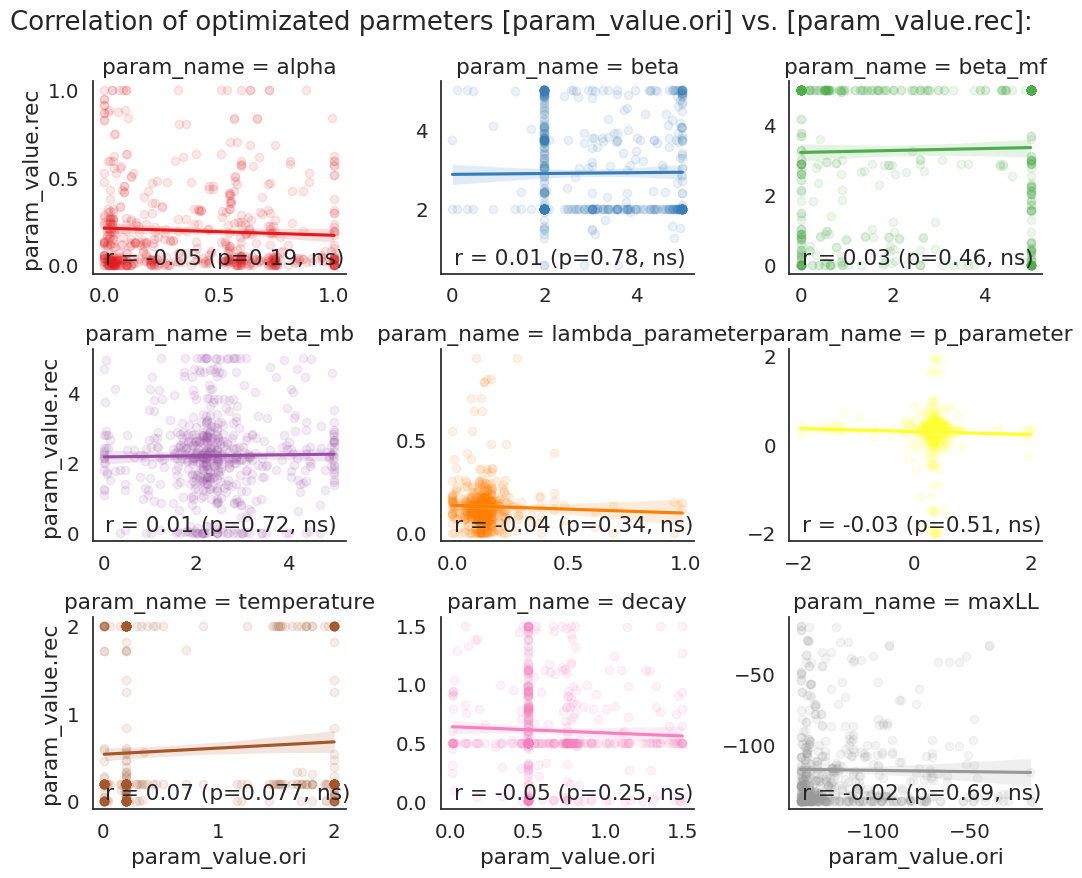

In [5]:
MarkovPlot.parameter_lm_plot(df=dfm, x_name='param_value.ori', y_name='param_value.rec', exclude_parameters=['lf', 'fixed_cost'], alpha=.1)